# HW3  Logistisc Regression 

## Due on 11/11/2019: 23:59 pm

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## In this HW, we will be building a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html


The goal of the HW is to see if one can predict
whether a woman on given certain attributeds, suchas age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [131]:
# The dataset can be imported via the statsmodels like the following, but we are going to read from a csv file
# provided by the professor
# import statsmodels.api as sm
# orig_df = sm.datasets.fair.load_pandas().data

df = pd.read_csv("affairs2.csv")
df.head()

rate_marriage   age  yrs_married  children  religious  educ occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0       occ2   
1            3.0  27.0         13.0       3.0        1.0  14.0       occ3   
2            4.0  22.0          2.5       0.0        1.0  16.0       occ3   
3            4.0  37.0         16.5       4.0        3.0  16.0       occ5   
4            5.0  27.0          9.0       1.0        1.0  14.0       occ3   

   occupation_husb   affairs  
0              5.0  0.111111  
1              4.0  3.230769  
2              5.0  1.400000  
3              5.0  0.727273  
4              4.0  4.666666

Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [132]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [133]:
df.head()

rate_marriage   age  yrs_married  children  religious  educ occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0       occ2   
1            3.0  27.0         13.0       3.0        1.0  14.0       occ3   
2            4.0  22.0          2.5       0.0        1.0  16.0       occ3   
3            4.0  37.0         16.5       4.0        3.0  16.0       occ5   
4            5.0  27.0          9.0       1.0        1.0  14.0       occ3   

   occupation_husb   affairs  had_affair  
0              5.0  0.111111           1  
1              4.0  3.230769           1  
2              5.0  1.400000           1  
3              5.0  0.727273           1  
4              4.0  4.666666           1

In [134]:
df.tail()

rate_marriage   age  yrs_married  children  religious  educ occupation  \
6466            5.0  32.0         13.0       2.0        3.0  17.0       occ4   
6467            4.0  32.0         13.0       1.0        1.0  16.0       occ5   
6468            5.0  22.0          2.5       0.0        2.0  14.0       occ3   
6469            5.0  32.0          6.0       1.0        3.0  14.0       occ3   
6470            4.0  22.0          2.5       0.0        2.0  16.0       occ2   

      occupation_husb  affairs  had_affair  
6466              3.0      0.0           0  
6467              5.0      0.0           0  
6468              1.0      0.0           0  
6469              4.0      0.0           0  
6470              4.0      0.0           0

### Let's do some exploratory data analysis. First check and remove missing values

### Question 1: Use a seaborn heatmap similar to what has shown in class to show if there are any missing values. Simply drop the rows that have missing values

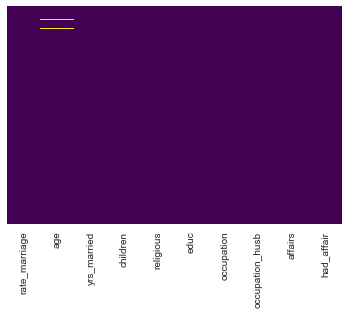

In [135]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [136]:
df.age.unique()

array([32. , 27. , 22. , 37. ,  nan, 42. , 17.5])

In [137]:
df.dropna(inplace=True)

After dropping the NA, run the df.isnull().sum(), it should show 0 for every features

In [138]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
had_affair         0
dtype: int64

### Now, let's group by has or no affairs rows

In [139]:
df.groupby('had_affair').mean()

rate_marriage        age  yrs_married  children  religious  \
had_affair                                                               
0                4.329701  28.390679     7.989335  1.238813   2.504521   
1                3.647345  30.537019    11.152460  1.728933   2.261568   

                 educ  occupation_husb   affairs  
had_affair                                        
0           14.322977         3.833758  0.000000  
1           13.972236         3.884559  2.187243

So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

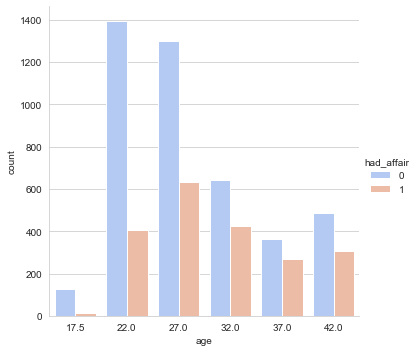

In [140]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

Now, we can do the same thing for years of marriage

### Question 2:  Use a factorplot to investigate if number of years of marriage is an important factor or not. Explain whether the chance of having an affair will increase or not when years of marriage increase

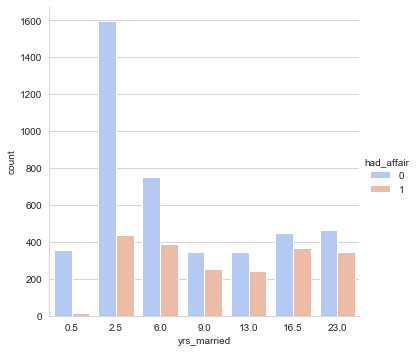

In [141]:
sns.factorplot('yrs_married', kind='count', hue='had_affair', data=df,palette='coolwarm')

***Yes, as you can see, when the increase in number of years of marriage the the chance of having an affair increases as well***

### Question 3: Now check also if number of children and education level are important factors or not. Explain what you had observed just from using the factorplot

Type your code and answers here

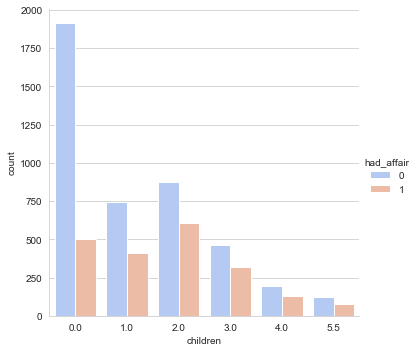

In [142]:
sns.factorplot('children', kind='count', hue='had_affair', data=df,palette='coolwarm')

***Having children decreases the amount of affairs, but the ratio between them stays consistent***

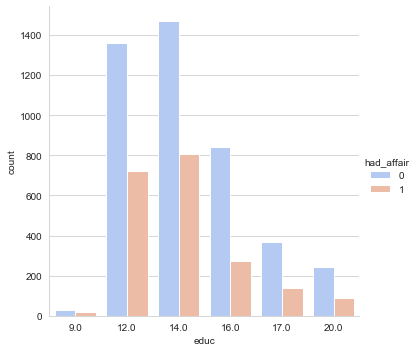

In [143]:
sns.factorplot('educ', kind='count', hue='had_affair', data=df,palette='coolwarm')

***As you can see the education level doesn't have much of an effect***

### Question 4: build a logistic regression model with only Age, Number of years married, number of children, education, religious to forecast had_affair. Remember to do the Train Test Split first

type your work here

In [144]:
# TODO:
# create a df2 from df with all the age, years of married, ... columns
# call train_test_split, remember to drop the had_affair columns in your X variables, Y should be had_affair
# create a LogisticRegression object and call its fit method
# call the classification report and print accuracy score

In [145]:
df2 = df[['age', 'children', 'educ', 'religious', 'had_affair', 'yrs_married']]

In [146]:
df2

age  children  educ  religious  had_affair  yrs_married
0     32.0       3.0  17.0        3.0           1          9.0
1     27.0       3.0  14.0        1.0           1         13.0
2     22.0       0.0  16.0        1.0           1          2.5
3     37.0       4.0  16.0        3.0           1         16.5
4     27.0       1.0  14.0        1.0           1          9.0
5     27.0       0.0  14.0        2.0           1          9.0
6     37.0       5.5  12.0        2.0           1         23.0
7     37.0       5.5  12.0        2.0           1         23.0
8     22.0       0.0  12.0        2.0           1          2.5
16    27.0       0.0  16.0        1.0           1          6.0
17    27.0       2.0  16.0        1.0           1          6.0
18    27.0       2.0  14.0        3.0           1          6.0
19    37.0       5.5  12.0        1.0           1         16.5
20    27.0       0.0  14.0        2.0           1          6.0
21    22.0       1.0  14.0        1.0           1          6.0
22    37.0       2.0  14.0        2.0           1          9.0
23    27.0       1.0  12.0        1.0           1          6.0
24    37.0       5.5  14.0        4.0           1         23.0
25    42.0       2.0  20.0        2.0           1         23.0
26    37.0       0.0  16.0        2.0           1          6.0
27    22.0       0.0  14.0        2.0           1          2.5
28    37.0       5.5   9.0        2.0           1         16.5
29    42.0       5.5  12.0        3.0           1         23.0
30    27.0       2.0  20.0        4.0           1          9.0
31    27.0       1.0  12.0        2.0           1          6.0
32    27.0       0.0  16.0        3.0           1          2.5
33    27.0       2.0  12.0        2.0           1          6.0
34    37.0       1.0  12.0        3.0           1         13.0
35    32.0       2.0  12.0        2.0           1         16.5
36    27.0       1.0  14.0        1.0           1          6.0
...    ...       ...   ...        ...         ...          ...
6441  42.0       4.0  14.0        3.0           0         23.0
6442  27.0       0.0  14.0        4.0           0          6.0
6443  42.0       2.0  12.0        3.0           0         23.0
6444  32.0       3.0  16.0        3.0           0         13.0
6445  27.0       3.0  16.0        3.0           0         13.0
6446  27.0       1.0  14.0        2.0           0          9.0
6447  22.0       0.0  16.0        2.0           0          2.5
6448  17.5       0.0  12.0        4.0           0          2.5
6449  32.0       2.0  12.0        2.0           0         16.5
6450  27.0       1.0  12.0        3.0           0          9.0
6451  22.0       0.0  14.0        4.0           0          2.5
6452  22.0       1.0  12.0        2.0           0          2.5
6453  27.0       0.0  20.0        4.0           0          0.5
6454  37.0       3.0  14.0        3.0           0         16.5
6455  32.0       2.0  14.0        4.0           0         13.0
6456  22.0       0.0  16.0        2.0           0          0.5
6457  42.0       2.0  12.0        4.0           0         23.0
6458  22.0       2.0  14.0        2.0           0          2.5
6459  42.0       4.0  12.0        4.0           0         23.0
6460  27.0       0.0  12.0        3.0           0          6.0
6461  32.0       3.0  12.0        3.0           0         13.0
6462  32.0       4.0  14.0        2.0           0         13.0
6463  27.0       2.0  14.0        4.0           0          6.0
6464  22.0       0.0  16.0        3.0           0          2.5
6465  22.0       0.0  14.0        2.0           0          2.5
6466  32.0       2.0  17.0        3.0           0         13.0
6467  32.0       1.0  16.0        1.0           0         13.0
6468  22.0       0.0  14.0        2.0           0          2.5
6469  32.0       1.0  14.0        3.0           0          6.0
6470  22.0       0.0  16.0        2.0           0          2.5

[6366 rows x 6 columns]

In [147]:
labels = np.array(df2['had_affair'])

In [148]:
df2 = df2.drop('had_affair', axis=1)

In [149]:
df2

age  children  educ  religious  yrs_married
0     32.0       3.0  17.0        3.0          9.0
1     27.0       3.0  14.0        1.0         13.0
2     22.0       0.0  16.0        1.0          2.5
3     37.0       4.0  16.0        3.0         16.5
4     27.0       1.0  14.0        1.0          9.0
5     27.0       0.0  14.0        2.0          9.0
6     37.0       5.5  12.0        2.0         23.0
7     37.0       5.5  12.0        2.0         23.0
8     22.0       0.0  12.0        2.0          2.5
16    27.0       0.0  16.0        1.0          6.0
17    27.0       2.0  16.0        1.0          6.0
18    27.0       2.0  14.0        3.0          6.0
19    37.0       5.5  12.0        1.0         16.5
20    27.0       0.0  14.0        2.0          6.0
21    22.0       1.0  14.0        1.0          6.0
22    37.0       2.0  14.0        2.0          9.0
23    27.0       1.0  12.0        1.0          6.0
24    37.0       5.5  14.0        4.0         23.0
25    42.0       2.0  20.0        2.0         23.0
26    37.0       0.0  16.0        2.0          6.0
27    22.0       0.0  14.0        2.0          2.5
28    37.0       5.5   9.0        2.0         16.5
29    42.0       5.5  12.0        3.0         23.0
30    27.0       2.0  20.0        4.0          9.0
31    27.0       1.0  12.0        2.0          6.0
32    27.0       0.0  16.0        3.0          2.5
33    27.0       2.0  12.0        2.0          6.0
34    37.0       1.0  12.0        3.0         13.0
35    32.0       2.0  12.0        2.0         16.5
36    27.0       1.0  14.0        1.0          6.0
...    ...       ...   ...        ...          ...
6441  42.0       4.0  14.0        3.0         23.0
6442  27.0       0.0  14.0        4.0          6.0
6443  42.0       2.0  12.0        3.0         23.0
6444  32.0       3.0  16.0        3.0         13.0
6445  27.0       3.0  16.0        3.0         13.0
6446  27.0       1.0  14.0        2.0          9.0
6447  22.0       0.0  16.0        2.0          2.5
6448  17.5       0.0  12.0        4.0          2.5
6449  32.0       2.0  12.0        2.0         16.5
6450  27.0       1.0  12.0        3.0          9.0
6451  22.0       0.0  14.0        4.0          2.5
6452  22.0       1.0  12.0        2.0          2.5
6453  27.0       0.0  20.0        4.0          0.5
6454  37.0       3.0  14.0        3.0         16.5
6455  32.0       2.0  14.0        4.0         13.0
6456  22.0       0.0  16.0        2.0          0.5
6457  42.0       2.0  12.0        4.0         23.0
6458  22.0       2.0  14.0        2.0          2.5
6459  42.0       4.0  12.0        4.0         23.0
6460  27.0       0.0  12.0        3.0          6.0
6461  32.0       3.0  12.0        3.0         13.0
6462  32.0       4.0  14.0        2.0         13.0
6463  27.0       2.0  14.0        4.0          6.0
6464  22.0       0.0  16.0        3.0          2.5
6465  22.0       0.0  14.0        2.0          2.5
6466  32.0       2.0  17.0        3.0         13.0
6467  32.0       1.0  16.0        1.0         13.0
6468  22.0       0.0  14.0        2.0          2.5
6469  32.0       1.0  14.0        3.0          6.0
6470  22.0       0.0  16.0        2.0          2.5

[6366 rows x 5 columns]

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
train_features, test_features, train_labels, test_labels = train_test_split(df2, labels, test_size=0.2, random_state=0)

In [152]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
predictions = model.predict(test_features)

In [154]:
from sklearn.metrics import classification_report, accuracy_score

In [155]:
print(classification_report(test_labels,predictions))
print(accuracy_score(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       885
           1       0.55      0.18      0.27       389

    accuracy                           0.70      1274
   macro avg       0.64      0.56      0.54      1274
weighted avg       0.67      0.70      0.65      1274

0.7048665620094191


### Question 5: Now, call a countplot to show the dependence of the affair on occupation, then include the occupation categorical variable to build a better model

type your work here

In [156]:
# call sns.countplot for occupation using the original df dataframe

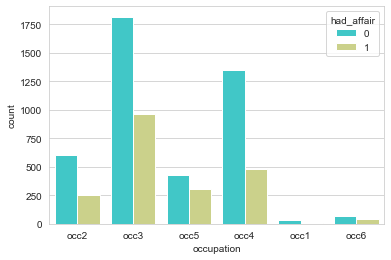

In [157]:
sns.set_style('whitegrid')
sns.countplot(x='occupation',hue='had_affair',data=df,palette='rainbow')

In [158]:
# call the get_dummies method for the occupation variable

In [159]:
sex = pd.get_dummies(df['occupation'],drop_first=True)

In [160]:
sex

occ2  occ3  occ4  occ5  occ6
0        1     0     0     0     0
1        0     1     0     0     0
2        0     1     0     0     0
3        0     0     0     1     0
4        0     1     0     0     0
5        0     1     0     0     0
6        0     0     0     1     0
7        1     0     0     0     0
8        0     1     0     0     0
16       0     1     0     0     0
17       0     1     0     0     0
18       0     1     0     0     0
19       1     0     0     0     0
20       0     1     0     0     0
21       0     0     1     0     0
22       0     1     0     0     0
23       0     1     0     0     0
24       0     0     0     1     0
25       0     0     1     0     0
26       0     0     0     1     0
27       0     1     0     0     0
28       0     1     0     0     0
29       0     0     0     1     0
30       0     1     0     0     0
31       0     0     0     1     0
32       0     0     1     0     0
33       1     0     0     0     0
34       0     1     0     0     0
35       0     0     1     0     0
36       0     1     0     0     0
...    ...   ...   ...   ...   ...
6441     0     0     0     1     0
6442     0     0     1     0     0
6443     1     0     0     0     0
6444     0     0     1     0     0
6445     0     0     1     0     0
6446     0     0     1     0     0
6447     0     0     1     0     0
6448     0     1     0     0     0
6449     0     1     0     0     0
6450     0     1     0     0     0
6451     0     0     1     0     0
6452     0     1     0     0     0
6453     0     0     1     0     0
6454     0     0     0     1     0
6455     0     1     0     0     0
6456     0     1     0     0     0
6457     0     1     0     0     0
6458     0     1     0     0     0
6459     0     1     0     0     0
6460     0     1     0     0     0
6461     0     1     0     0     0
6462     0     0     1     0     0
6463     0     1     0     0     0
6464     0     0     0     1     0
6465     0     1     0     0     0
6466     0     0     1     0     0
6467     0     0     0     1     0
6468     0     1     0     0     0
6469     0     1     0     0     0
6470     1     0     0     0     0

[6366 rows x 5 columns]

In [161]:
# create a df3 which is combining df2 with this new set of dummy variables using pd.concat method

In [162]:
df3 = pd.concat([df2, sex], axis=1)

In [163]:
# now you have a df3 with 10 features 
# call train test split and do the usual model fitting and model performance things

In [164]:
df3

age  children  educ  religious  yrs_married  occ2  occ3  occ4  occ5  \
0     32.0       3.0  17.0        3.0          9.0     1     0     0     0   
1     27.0       3.0  14.0        1.0         13.0     0     1     0     0   
2     22.0       0.0  16.0        1.0          2.5     0     1     0     0   
3     37.0       4.0  16.0        3.0         16.5     0     0     0     1   
4     27.0       1.0  14.0        1.0          9.0     0     1     0     0   
5     27.0       0.0  14.0        2.0          9.0     0     1     0     0   
6     37.0       5.5  12.0        2.0         23.0     0     0     0     1   
7     37.0       5.5  12.0        2.0         23.0     1     0     0     0   
8     22.0       0.0  12.0        2.0          2.5     0     1     0     0   
16    27.0       0.0  16.0        1.0          6.0     0     1     0     0   
17    27.0       2.0  16.0        1.0          6.0     0     1     0     0   
18    27.0       2.0  14.0        3.0          6.0     0     1     0     0   
19    37.0       5.5  12.0        1.0         16.5     1     0     0     0   
20    27.0       0.0  14.0        2.0          6.0     0     1     0     0   
21    22.0       1.0  14.0        1.0          6.0     0     0     1     0   
22    37.0       2.0  14.0        2.0          9.0     0     1     0     0   
23    27.0       1.0  12.0        1.0          6.0     0     1     0     0   
24    37.0       5.5  14.0        4.0         23.0     0     0     0     1   
25    42.0       2.0  20.0        2.0         23.0     0     0     1     0   
26    37.0       0.0  16.0        2.0          6.0     0     0     0     1   
27    22.0       0.0  14.0        2.0          2.5     0     1     0     0   
28    37.0       5.5   9.0        2.0         16.5     0     1     0     0   
29    42.0       5.5  12.0        3.0         23.0     0     0     0     1   
30    27.0       2.0  20.0        4.0          9.0     0     1     0     0   
31    27.0       1.0  12.0        2.0          6.0     0     0     0     1   
32    27.0       0.0  16.0        3.0          2.5     0     0     1     0   
33    27.0       2.0  12.0        2.0          6.0     1     0     0     0   
34    37.0       1.0  12.0        3.0         13.0     0     1     0     0   
35    32.0       2.0  12.0        2.0         16.5     0     0     1     0   
36    27.0       1.0  14.0        1.0          6.0     0     1     0     0   
...    ...       ...   ...        ...          ...   ...   ...   ...   ...   
6441  42.0       4.0  14.0        3.0         23.0     0     0     0     1   
6442  27.0       0.0  14.0        4.0          6.0     0     0     1     0   
6443  42.0       2.0  12.0        3.0         23.0     1     0     0     0   
6444  32.0       3.0  16.0        3.0         13.0     0     0     1     0   
6445  27.0       3.0  16.0        3.0         13.0     0     0     1     0   
6446  27.0       1.0  14.0        2.0          9.0     0     0     1     0   
6447  22.0       0.0  16.0        2.0          2.5     0     0     1     0   
6448  17.5       0.0  12.0        4.0          2.5     0     1     0     0   
6449  32.0       2.0  12.0        2.0         16.5     0     1     0     0   
6450  27.0       1.0  12.0        3.0          9.0     0     1     0     0   
6451  22.0       0.0  14.0        4.0          2.5     0     0     1     0   
6452  22.0       1.0  12.0        2.0          2.5     0     1     0     0   
6453  27.0       0.0  20.0        4.0          0.5     0     0     1     0   
6454  37.0       3.0  14.0        3.0         16.5     0     0     0     1   
6455  32.0       2.0  14.0        4.0         13.0     0     1     0     0   
6456  22.0       0.0  16.0        2.0          0.5     0     1     0     0   
6457  42.0       2.0  12.0        4.0         23.0     0     1     0     0   
6458  22.0       2.0  14.0        2.0          2.5     0     1     0     0   
6459  42.0       4.0  12.0        4.0         23.0     0     1     0     0   
6460  27.0       0.0  12.0   

In [165]:
train_features, test_features, train_labels, test_labels = train_test_split(df3, labels, test_size=0.2, random_state=0)

In [166]:
model = LogisticRegression()
model.fit(train_features,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
predictions = model.predict(test_features)

In [168]:
print(classification_report(test_labels,predictions))
print(accuracy_score(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       885
           1       0.55      0.20      0.29       389

    accuracy                           0.70      1274
   macro avg       0.64      0.56      0.55      1274
weighted avg       0.67      0.70      0.65      1274

0.7048665620094191


## Question 6: Can you comment on your results based on the performance metrics (Precision, Recall and Accuracy Score)?

Type your answer

***The precision, recall, and accuracy score did not change at all***